In [26]:

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

# Ayudantía 10


### Regresión Lineal ###
$\hat{y_i} = \alpha x_i + \beta$

<img src="lineal.png" alt="Regresión Lineal" width="300" />




### Regresión Polinomial ###
 $ \hat{y_i} = \alpha_0 + \alpha_1 x_i + \alpha_2 x_i^2 + \cdots + \alpha_p x_i^p $
 
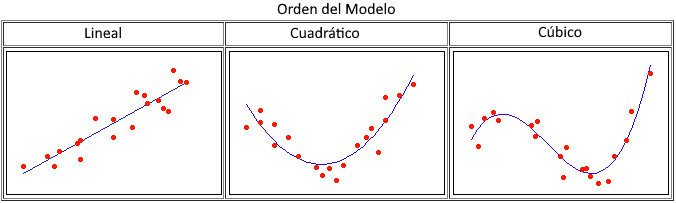



### Regresión Multilineal ###
$\hat{y_i} = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \cdots + \beta_k x_{ki}
$

<img src="linealmultiple.png" alt="Regresión Lineal" width="300" />




## Indicadores para evaluar la calidad de nuestros modelos 

### Coefficient of Determination.

$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $




### Relación entre SST, SSR, SSE y \( R^2 \)

1. **Suma Total de Cuadrados (SST)**:
   - $$ \text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$
     - **Variables**:
       - $ \ y_i \ $: Valores observados de la variable dependiente.
       - $ \bar{y} $: Media de los valores observados.

2. **Suma de Cuadrados de la Regresión (SSR)**:
   - $$ \text{SSR} = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2 $$
     - **Variables**:
       - $ \hat{y}_i $: Valores predichos por el modelo.
       - $ \bar{y} $: Media de los valores observados.

3. **Suma de Cuadrados del Error (SSE)**:
   - $$ \text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
     - **Variables**:
       - $ \ y_i \ $: Valores observados de la variable dependiente.
       - $ \hat{y}_i $: Valores predichos por el modelo.

### Relación entre SST, SSR y SSE:
- $$ \text{SST} = \text{SSR} + \text{SSE} $$

### Coeficiente de Determinación \( R^2 \):
- $$ R^2 = \frac{\text{SSR}}{\text{SST}} = 1 - \frac{\text{SSE}}{\text{SST}} $$

### Resumen:
- El coeficiente de determinación \( R^2 \) mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.




### Root Mean Squared Error

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}
$

### Ejemplo

Trabajaremos con los datos de Boston Housing Data que es un conjunto de datos que contiene información sobre el mercado de viviendas en Boston, las columnas de este dataset son las siguientes

- **crim**: Tasa de criminalidad per cápita por ciudad
- **zn**: Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados
- **indus**: Proporción de acres de negocios no minoristas por ciudad
- **chas**: Variable ficticia del río Charles (= 1 si el área limita con el río; 0 de lo contrario)
- **nox**: Concentración de óxidos de nitrógeno (partes por 10 millones)
- **rm**: Número promedio de habitaciones por vivienda
- **age**: Proporción de unidades ocupadas por propietarios construidas antes de 1940
- **dis**: Distancias ponderadas a cinco centros de empleo de Boston
- **rad**: Índice de accesibilidad a autopistas radiales
- **tax**: Tasa de impuestos sobre la propiedad de valor total por cada $10,000
- **b**: 1000(Bk - 0.63)², donde Bk es la proporción de [personas de ascendencia afroamericana] por ciudad
- **lstat**: Porcentaje de población de estatus socioeconómico bajo
- **medv**: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares


Cargamos nuestro dataset

In [27]:
df = pd.read_csv('BostonHousing.csv')

Limpiamos nuestro dataset

In [28]:
df = df.dropna()

####  Filtremos nuestros Datos por nuestras columnas de interes medv (Valor mediano de las viviendas), rm (Numero Promedio habtiaciones por vivienda) y lstat (Porcentaje de poblacíon de estatus socioeconomico bajo)


In [29]:
df = df[['medv' ,'rm', 'lstat']]

In [30]:
df

,medv,rm,lstat
0,24.0,6.575,4.98
1,21.6,6.421,9.14
2,34.7,7.185,4.03
3,33.4,6.998,2.94
4,36.2,7.147,5.33
...,...,...,...
501,22.4,6.593,9.67
502,20.6,6.120,9.08
503,23.9,6.976,5.64
504,22.0,6.794,6.48


#### Primer paso encontrar correlaciones

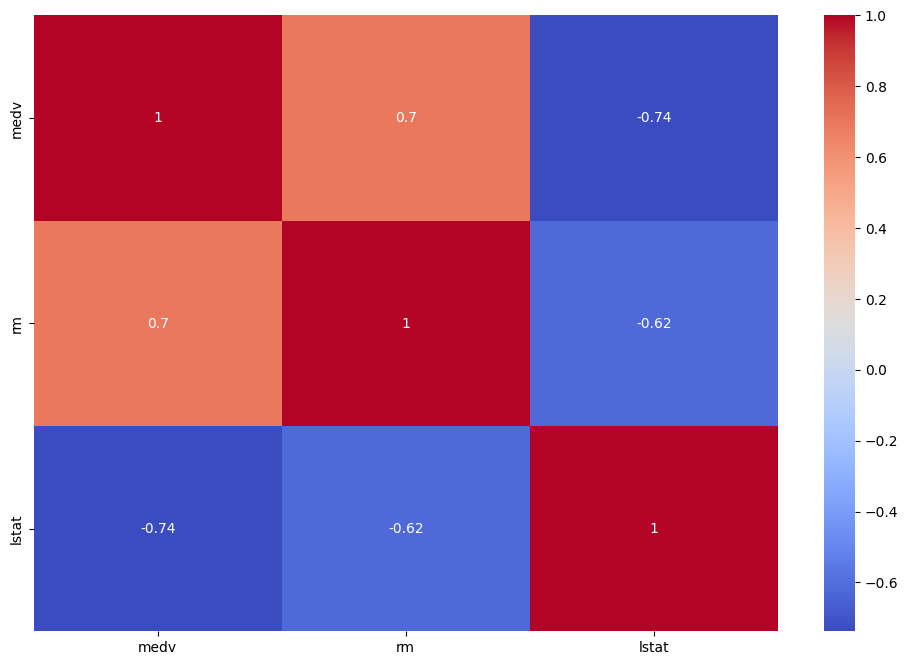

In [31]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Analizamos con pairplot como se ven las correlaciones


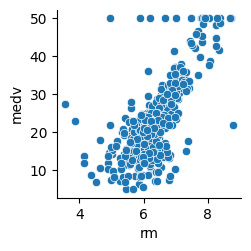

In [32]:
sns.pairplot(data=df, y_vars='medv', x_vars='rm')

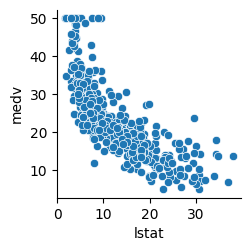

In [33]:
sns.pairplot(data=df, y_vars='medv', x_vars='lstat')

## Regresión lineal
#### Variable independiente $ rm $

#### Variable dependiente $ medv $

### 1) Primer paso


#### Dividir nuestro data set, datos para entrenamiento y datos para testing

In [34]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=42)

### 2) Segundo Paso

#### Transformamos a un array de numpy los datos 
#### sklearn requiere que X sea una matrix de (n_samples x n_variables)

In [35]:

y_train = np.array(train.medv)
y_test = np.array(test.medv)


X_train = np.array(train.rm)

X_train = X_train.reshape(X_train.shape[0], 1)


X_test = np.array(test.rm)
X_test = X_test.reshape(X_test.shape[0], 1)


### 3) Tercer paso 

#### Creamos nuestro modelo 


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creamos nuestro modelo
linreg = LinearRegression()

## Le pasamos los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

#### Si queremos los coeficientes de nuestro modelo lineal


In [37]:
print('coeficientes del modelo: \n', linreg.intercept_, linreg.coef_[0])

coeficientes del modelo: 
 -34.69335803361282 9.13454990515654


### 4) Cuarto Paso

#### Realizar las predicciones de nuestro modelo tanto  para los datos de entrenamiento y testing

In [38]:


y_pred_train = linreg.predict(X_train)
R2_lineal_train = r2_score(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train)
print('\nConjunto de entrenamiento')
print(r'R^2 (train)',R2_lineal_train)
print('RMSE (train)', rmse_train)

y_pred_test = linreg.predict(X_test)
R2_lineal_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test)
print('\nConjunto de prueba')
print(r'R^2 (test)',R2_lineal_test)
print('RMSE (test)', rmse_test)


Conjunto de entrenamiento
R^2 (train) 0.4739047703607694
RMSE (train) 46.225920896108185

Conjunto de prueba
R^2 (test) 0.5139029661697858
RMSE (test) 36.82808053589672


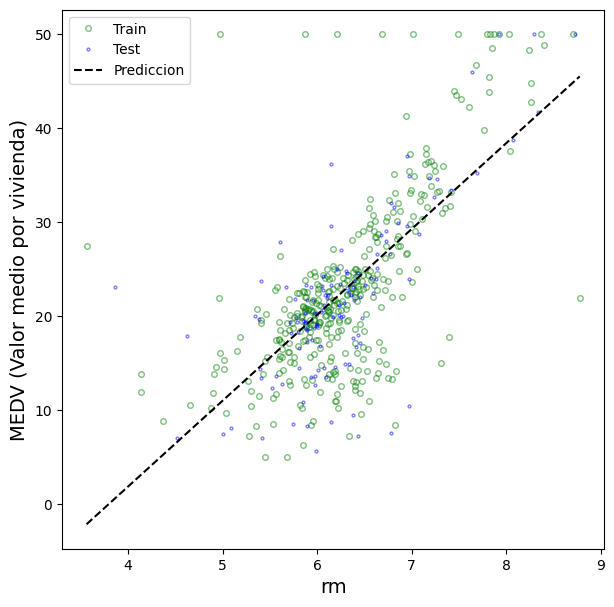

In [39]:
fig1, ax = plt.subplots(1,1, figsize=(7,7))

ax.plot(train['rm'], train['medv'],'o', markersize=4, mec='green', mfc='None', label='Train', alpha=0.5) 
ax.plot(test['rm'], test['medv'],'.', markersize=4, mec='blue', mfc='None', label='Test', alpha=0.5) 
#obtenemos  el eje x
xgrid = np.linspace(np.min(train['rm']), np.max(train['rm']), 100)
y_values  =  linreg.intercept_  + linreg.coef_[0]*xgrid
ax.plot(xgrid, y_values, label='Prediccion', color='k', ls='--')
ax.set_xlabel('rm', fontsize=14)
ax.set_ylabel('MEDV (Valor medio por vivienda)', fontsize=14)
ax.legend()

### Pongamos en practica lo aprendido, realicemos una regresión lineal

#### Con fines practicos realicemos todo denuevo 

Variable independiente $ LSTAT $

Variable dependiente $ MEDV $

LinearRegression()

#### Calcula el Coeficiende de Correlación R^2 y el RMSE del modelo realizado 


Conjunto de entrenamiento
R^2 (train) 0.5476562737536093
RMSE (train) 39.745666049197006

Conjunto de prueba
R^2 (test) 0.520662468938031
RMSE (test) 36.31596156580133


#### Grafica la regresion realizada, dividiendo los los datos tanto en train and test, con su respectiva linea de regresión

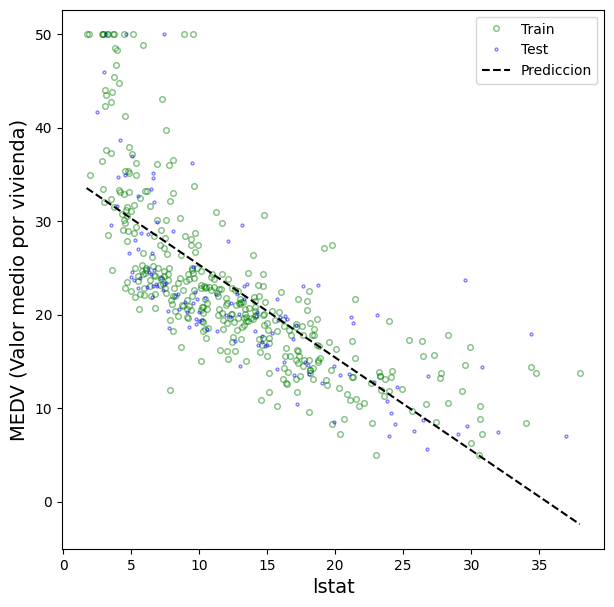

## Ahora si queremos mejorar nuestro modelo en este caso podemos hacerlo polinomial ¿Cómo?


#### 1) Primer Paso importar  PolynomialFeatures y crear nuestro Transformador de valores X que dependera del grado que queramos ocupar

In [45]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(10, include_bias=False)

expanded_test = transformer.fit_transform(X_test)

expanded_train = transformer.fit_transform(X_train)

In [46]:
expanded_train

array([[2.32900000e+01, 5.42424100e+02, 1.26330573e+04, ...,
        8.65677058e+10, 2.01616187e+12, 4.69564099e+13],
       [1.46600000e+01, 2.14915600e+02, 3.15066270e+03, ...,
        2.13339740e+09, 3.12756060e+10, 4.58500383e+11],
       [1.26000000e+01, 1.58760000e+02, 2.00037600e+03, ...,
        6.35278797e+08, 8.00451285e+09, 1.00856862e+11],
       ...,
       [4.50000000e+00, 2.02500000e+01, 9.11250000e+01, ...,
        1.68151254e+05, 7.56680643e+05, 3.40506289e+06],
       [2.21100000e+01, 4.88852100e+02, 1.08085199e+04, ...,
        5.71097081e+10, 1.26269565e+12, 2.79182007e+13],
       [1.86600000e+01, 3.48195600e+02, 6.49732990e+03, ...,
        1.46991802e+10, 2.74286703e+11, 5.11818988e+12]])

#### 2) Segundo paso  Entrenar nuestro modelo de LinearRegression con los valores X expandidos

In [47]:
reg_poly = LinearRegression().fit(expanded_train, y_train)

#### 3) Tercer Paso  Realizar las predicciones

In [48]:
y_pred_train = reg_poly.predict(expanded_train)
y_pred_test = reg_poly.predict(expanded_test)

print('coeficientes del modelo: \n', reg_poly.intercept_, reg_poly.coef_[0], reg_poly.coef_[1])

coeficientes del modelo: 
 60.0742732409632 -1.6345531884139914 -3.604332031920793


#### 4) Cuarto paso  Evaluamos el rendimiento de nuestro modelo

In [49]:
rmse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('\nConjunto de entrenamiento')
print('RMSE (train)', rmse_train)

print('R2(train)', r2_train)

print('\nConjunto de prueba')
print('RMSE (test)', rmse_test)

print('R2 (test)', r2_test)


Conjunto de entrenamiento
RMSE (train) 27.17742088317481
R2(train) 0.6906949347170359

Conjunto de prueba
RMSE (test) 27.498100260620827
R2 (test) 0.6370501862125311


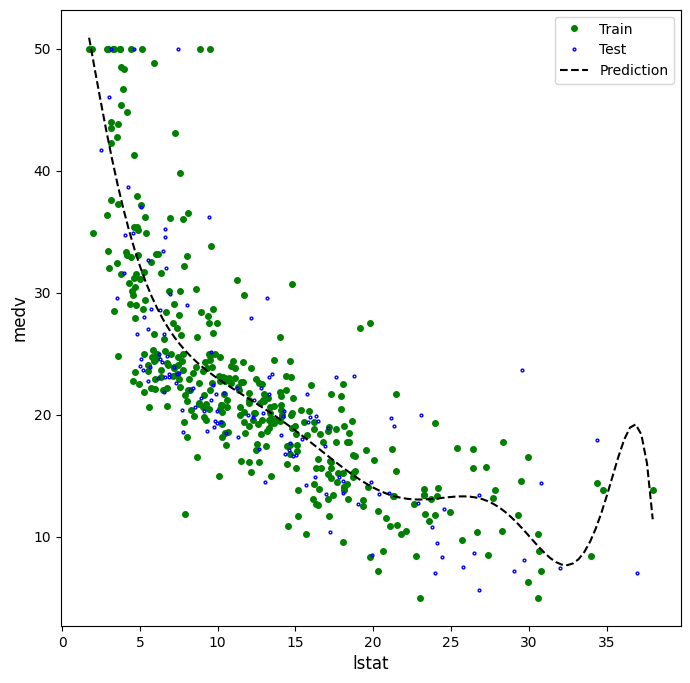

In [50]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(train.lstat, train.medv, 'o', color='green',label='Train', markersize=4) 
ax.plot(test.lstat, test.medv, '.', markersize=4, mec='blue', mfc='None', label='Test') 


x_vals = np.linspace(np.min(train.lstat), np.max(train.lstat), 100).reshape(-1,1)

expanded_x_vals = transformer.fit_transform(x_vals)

y_values  = reg_poly.predict(expanded_x_vals)

ax.plot(x_vals, y_values, label='Prediction', color='k', ls='--')
ax.set_xlabel("lstat", fontsize=12)
ax.set_ylabel("medv", fontsize=12)
ax.legend()

#### Referencia I2-2023

In [51]:
# funcion para predecir
def predict_model(poly_model, x_vals, poly_transformer=None):

    # optionally use the passed-in transformer
    if poly_transformer != None:
        dm = poly_transformer.fit_transform(x_vals)
    else:
        dm = x_vals
        
    # make the prediction at each x value
    prediction = poly_model.predict(dm)
    
    return(prediction)

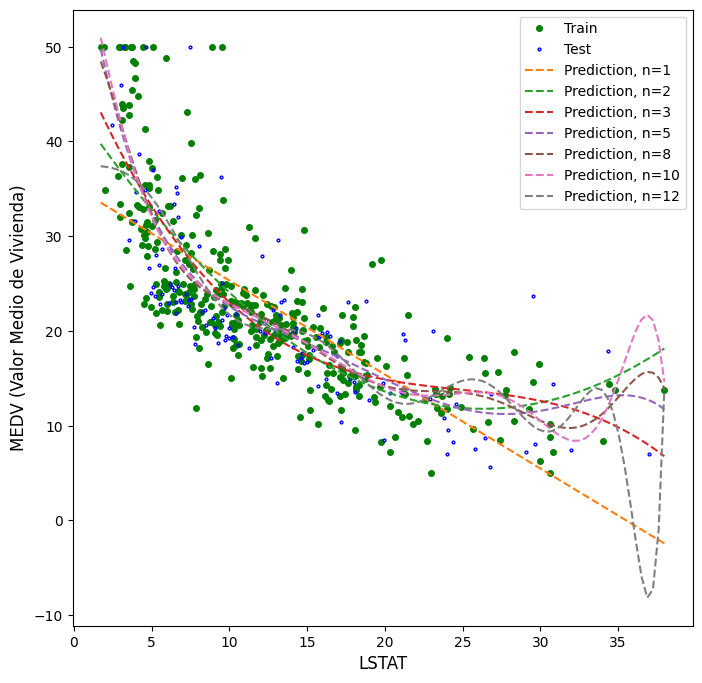

In [52]:
# grados a probar
polydegree = [1, 2, 3, 5, 8, 10, 12]

# almacenar el RMSE para cada modelo
error_test=[]
error_train=[]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(train.lstat, train.medv, 'o', color='green',label='Train', markersize=4) 
ax.plot(test.lstat, test.medv, '.', markersize=4, mec='blue', mfc='None', label='Test') 


# entrenar y probar cada modelo
for n in polydegree:
    # armar modelo
    transformer = PolynomialFeatures(n)
    
    # entrenar el modelo
    expanded_train = transformer.fit_transform(X_train)
    reg_poly = LinearRegression().fit(expanded_train, y_train)
    
    # pruebas
    y_pred_train = predict_model(reg_poly, X_train, transformer)
    y_pred_test = predict_model(reg_poly, X_test, transformer)
    
    # calculo de error
    rmse_train = mean_squared_error(y_train, y_pred_train)
    rmse_test = mean_squared_error(y_test, y_pred_test)
    # agregar a listas de valores
    error_test.append(rmse_test)
    error_train.append(rmse_train)
    
    # graficar el modelo
    x_vals = np.linspace(np.min(train['lstat']), np.max(train['lstat']), 100).reshape(-1,1)
    prediction = predict_model(reg_poly, x_vals, transformer)
    ax.plot(x_vals, prediction, label='Prediction, n=%d'%n, ls='--')

ax.set_xlabel("LSTAT", fontsize=12)
ax.set_ylabel("MEDV (Valor Medio de Vivienda)", fontsize=12)
ax.legend()

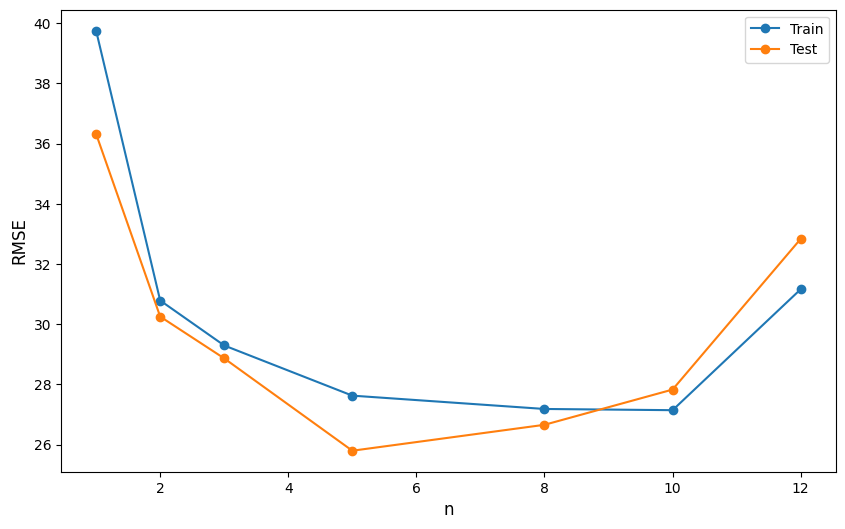

In [53]:
# gráfico de error
fig, ax = plt.subplots(1,1, figsize=(10, 6))

ax.plot(polydegree, error_train, 'o-', label='Train')
ax.plot(polydegree, error_test, 'o-', label='Test')

ax.set_xlabel("n", fontsize=12)
ax.set_ylabel("RMSE", fontsize=12)
ax.legend()

### Regresion Multilineal

In [54]:
# ajustamos los datos para poder usarlo en un modelo en sklearn
y_train = np.array(train['medv'])
y_test = np.array(test['medv'])

X_train = np.array(train[['lstat', 'rm']])
X_test = np.array(test[['lstat', 'rm']])

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# armamos el modelo y lo entrenamos
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('coeficientes del modelo: \n', linreg.intercept_, linreg.coef_[0])

# usamos el modelo para predecir sobre el conjunto de entrenamiento
y_pred_train = linreg.predict(X_train)
R2_lineal_train = linreg.score(X_train, y_train)
rmse_train = mean_squared_error(y_train, y_pred_train)
print('\nConjunto de entrenamiento')
print(r'R^2 (train)',R2_lineal_train)
print('RMSE (train)', rmse_train)

# predecir valores de y para el set de prueba
y_pred_test = linreg.predict(X_test)
R2_lineal_test = linreg.score(X_test, y_test)
rmse_test = mean_squared_error(y_test, y_pred_test)
print('\nConjunto de prueba')
print(r'R^2 (test)',R2_lineal_test)
print('RMSE (test)', rmse_test)

coeficientes del modelo: 
 -0.07539258061553866 -0.683408608260953

Conjunto de entrenamiento
R^2 (train) 0.6363227108752998
RMSE (train) 31.954894573588525

Conjunto de prueba
R^2 (test) 0.6370643031685173
RMSE (test) 27.49703072027024
